___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://i0.wp.com/laid.delanover.com/wp-content/uploads/2018/01/reg_formulas.png?w=550&ssl=1" width="350px" height="480px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- 
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://i0.wp.com/laid.delanover.com/wp-content/uploads/2018/01/reg_formulas.png?w=550&ssl=1</p>

### <font color= #2E9AFE> Tema: Regularización</font>

## Ejemplo: predecir la progresión de la enfermedad en la diabetes

Este conjunto de datos contiene 10 características, como edad, sexo, índice de masa corporal (IMC), presión arterial y varias mediciones del suero sanguíneo, que se utilizan para predecir una medida cuantitativa de la progresión de la enfermedad un año después del inicio.

Aplicaremos tres técnicas de regularización (Ridge (L2), Lasso (L1) y Elastic Net (una combinación de L1 y L2) a un modelo de regresión lineal y compararemos su rendimiento.

**Nota:** Aunque la progresión real de la diabetes se rige por complejos procesos biológicos no lineales, aquí utilizamos intencionalmente modelos lineales para mayor claridad. La regresión lineal nos permite demostrar claramente los efectos de la regularización en el sobreajuste, la reducción de coeficientes y la selección de características. Los modelos más avanzados, pueden producir una mayor precisión, pero a menudo dificultan la interpretación.

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

In [11]:
# Cargar datos
X, y = load_diabetes(return_X_y=True, as_frame=True)
feature_names = X.columns

In [12]:
df = pd.concat([X,y], axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [13]:
df.shape

(442, 11)

In [14]:
#Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<Axes: >

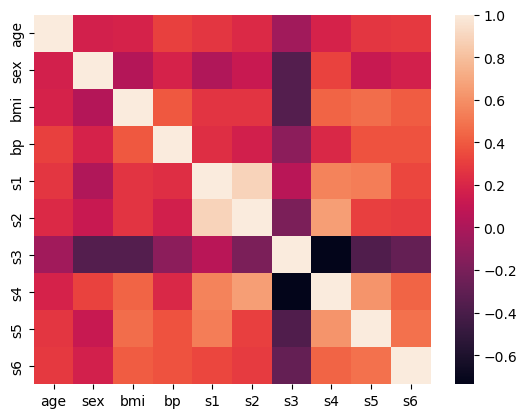

In [15]:
import seaborn as sns
sns.heatmap(X_train.corr())

In [16]:
# Definimos los modelos y el grid de hiperparametros a probar
models = {
    "Ridge": (Ridge(), {"alpha": [0.01, 0.1, 1, 10, 100]}),
    "Lasso": (Lasso(max_iter=10000), {"alpha": [0.0001, 0.001, 0.01, 0.1, 1]}),
    "ElasticNet": (
        ElasticNet(max_iter=10000),
        {"alpha": [0.0001, 0.001, 0.01, 0.1], "l1_ratio": [0.1, 0.5, 0.9]}
    )
}
# Aplicamos grid search para buscar los hiperparámetros optimos
results = []
coefs = {}

for name, (model, param_grid) in models.items():
    search = GridSearchCV(model, param_grid, cv=5, scoring="neg_root_mean_squared_error")
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    non_zero = np.sum(best_model.coef_ != 0)

    results.append({
        "Model": name,
        "Mejores hiperparametros": search.best_params_,
        "Test RMSE": round(rmse, 4),
        "Test R²": round(r2, 4),
        "Test MAE": round(mae, 4),
        "Coeficientes que no son cero": non_zero
    })
    coefs[name] = best_model.coef_

In [17]:
# Ver resultados de comparacion de modelos
results_df = pd.DataFrame(results)
coefs_df = pd.DataFrame(coefs)
coefs_df["Feature"] = feature_names.values
print("Comparar modelos:\n")
results_df

Comparar modelos:



,Model,Mejores hiperparametros,Test RMSE,Test R²,Test MAE,Coeficientes que no son cero
0,Ridge,{'alpha': 0.1},53.4461,0.4609,42.9969,10
1,Lasso,{'alpha': 0.1},52.8980,0.4719,42.8544,7
2,ElasticNet,"{'alpha': 0.001, 'l1_ratio': 0.9}",53.5690,0.4584,42.8666,10


Aunque los tres modelos obtuvieron un rendimiento similar en términos de RMSE, MAE y R², Lasso superó ligeramente a los demás en ambas métricas. 

Es importante destacar que Lasso redujo la cantidad de variables de 10 a 7, lo que demuestra su capacidad para realizar la selección de variables.


In [18]:
print("\nCoeficientes por modelo:\n", coefs_df[["Feature", "Ridge", "Lasso", "ElasticNet"]])


Coeficientes por modelo:
   Feature       Ridge       Lasso  ElasticNet
0     age   42.855670    0.000000   41.468015
1     sex -205.494319 -152.664779 -226.356574
2     bmi  505.089033  552.697775  536.023887
3      bp  317.093205  303.365158  333.279929
4      s1 -108.500262  -81.365007 -206.106840
5      s2  -86.236733   -0.000000  -32.825009
6      s3 -190.363180 -229.255776 -157.610068
7      s4  151.707086    0.000000  167.895704
8      s5  392.289319  447.919525  448.057530
9      s6   79.908177   29.642617   64.277516


#### La regularización siempre es mejor???


#### Cuándo usar cada uno?

- Ridge es ideal cuando deseas reducir el sobreajuste manteniendo todas las variables. Funciona bien cuando todas las variables son importantes pero potencialmente relacionadas.
- Lasso es poderosa cuando la selección de variables es una prioridad. Elimina por completo las características menos útiles al reducir sus coeficientes a cero.
- ElasticNet combina ambos enfoques. Es útil cuando sospechas que hay correlaciones entre variables y aún desea algo de reducción de variables.

#### Cuándo aplicar la regularización?

- Tienes una gran cantidad de variables o multicolinealidad potencial.
- Tu modelo se está sobreajustando a los datos de entrenamiento
- Necesitas un modelo más simple e interpretable

#### Proceso recomendado:
1. Comienza con Ridge (L2) si tu objetivo es la estabilidad y no estás tan seguro de eliminar características.
2. Prueba Lasso (L1) si sospecha que muchas variables son irrelevantes y desea una selección automática de variables.
3. Utiliza ElasticNet si necesitas un equilibrio entre reducción de variables y estabilidad, especialmente cuando las variables están correlacionadas.
4. Ajusta los hiperparámetros mediante cross validation